# 1. 라이브러리

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 2. 데이터 확인

In [2]:
df = pd.read_csv('CarPrice_Assignment.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [3]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [6]:
df.duplicated().sum()

0

**결측치, 중복값 없음. 범주형 변수와 수치형 변수 모두 다루어야 함**

# 3. EDA

price               1.000000
enginesize          0.874145
curbweight          0.835305
horsepower          0.808139
carwidth            0.759325
carlength           0.682920
wheelbase           0.577816
boreratio           0.553173
carheight           0.119336
stroke              0.079443
compressionratio    0.067984
symboling          -0.079978
peakrpm            -0.085267
car_ID             -0.109093
citympg            -0.685751
highwaympg         -0.697599
Name: price, dtype: float64


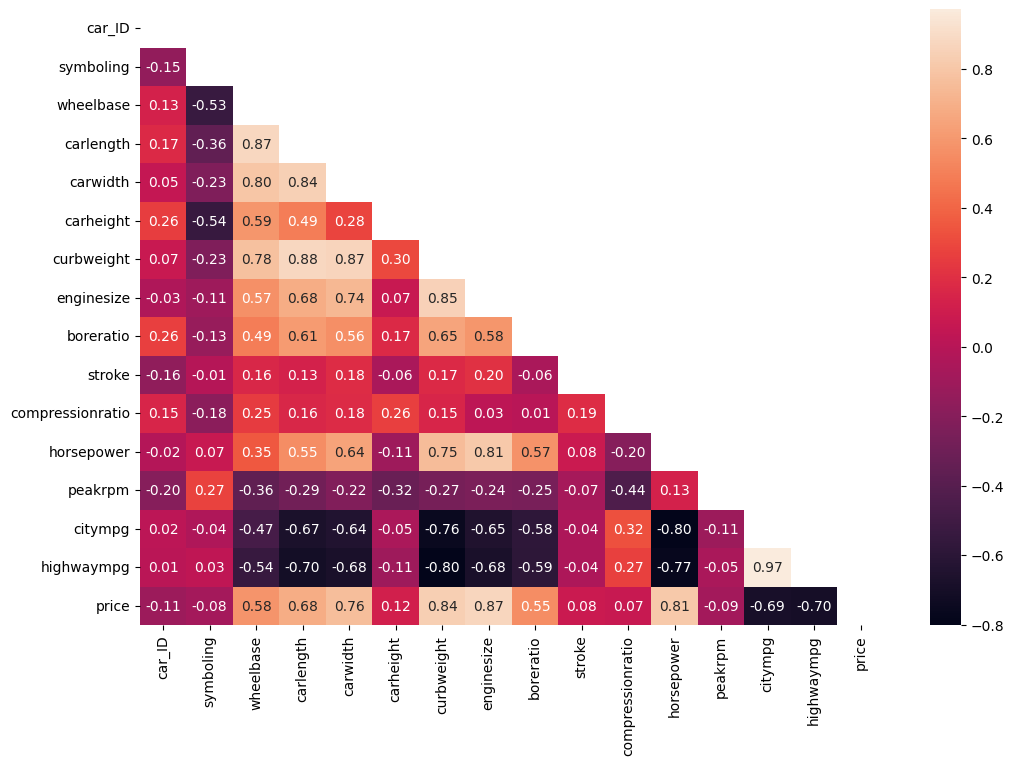

In [14]:
corr = df.corr()

plt.figure(figsize = (12,8))
mask = np.triu(np.ones_like(corr, dtype = bool))
sns.heatmap(corr, annot = True, fmt = ".2f", mask = mask)

print(corr['price'].sort_values(ascending = False))

- 타겟 변수와 연관성이 낮은 변수
    - carheight           0.119336
    - stroke              0.079443
    - compressionratio    0.067984
    - symboling          -0.079978
    - peakrpm            -0.085267
    - car_ID             -0.109093 (분석에서 제외한다)

In [16]:
X = df.drop(['price'], axis = 1)
X = X.drop(['car_ID'], axis = 1)
y = df[['price']]

In [17]:
ob_index = []

for col in X.columns:
    if X[col].dtype == 'object':
        ob_index.append(col)

num_index = X.columns.difference(ob_index)
num_index = list(num_index)

print(ob_index) ; print(num_index)

['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']
['boreratio', 'carheight', 'carlength', 'carwidth', 'citympg', 'compressionratio', 'curbweight', 'enginesize', 'highwaympg', 'horsepower', 'peakrpm', 'stroke', 'symboling', 'wheelbase']


## 3-1. 범주형 변수 EDA

In [18]:
X[ob_index].head()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi 100 ls,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi 100ls,gas,std,four,sedan,4wd,front,ohc,five,mpfi


In [20]:
X['brand'] = X['CarName'].str.split(" ").str[0]
ob_index.append('brand')

In [21]:
print(X['doornumber'].unique(), X['cylindernumber'].unique())

['two' 'four'] ['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']


In [22]:
X['doornumber'] = X['doornumber'].replace({'two': 2, 'four': 4})
X['cylindernumber'] = X['cylindernumber'].replace({'four':4, 'six':6, 'five':5, 'three':3, 'twelve':12, 'two':2, 'eight':8})

In [24]:
X.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,brand
0,3,alfa-romero giulia,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,alfa-romero
1,3,alfa-romero stelvio,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,alfa-romero
2,1,alfa-romero Quadrifoglio,gas,std,2,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,alfa-romero
3,2,audi 100 ls,gas,std,4,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,audi
4,2,audi 100ls,gas,std,4,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,audi


## 3-2. 수치형 변수 EDA

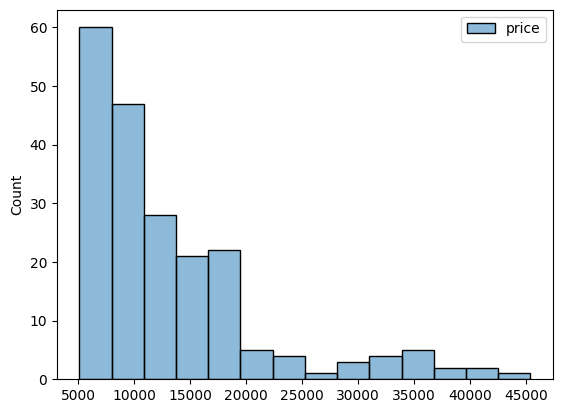

In [28]:
sns.histplot(y)
plt.show()

In [25]:
X[num_index].head()

,boreratio,carheight,carlength,carwidth,citympg,compressionratio,curbweight,enginesize,highwaympg,horsepower,peakrpm,stroke,symboling,wheelbase
0,3.47,48.8,168.8,64.1,21,9.0,2548,130,27,111,5000,2.68,3,88.6
1,3.47,48.8,168.8,64.1,21,9.0,2548,130,27,111,5000,2.68,3,88.6
2,2.68,52.4,171.2,65.5,19,9.0,2823,152,26,154,5000,3.47,1,94.5
3,3.19,54.3,176.6,66.2,24,10.0,2337,109,30,102,5500,3.40,2,99.8
4,3.19,54.3,176.6,66.4,18,8.0,2824,136,22,115,5500,3.40,2,99.4


In [30]:
X['carvolume'] = X['carheight'] * X['carlength'] * X['carwidth']
num_index.append('carvolume')

In [31]:
len(num_index)

15

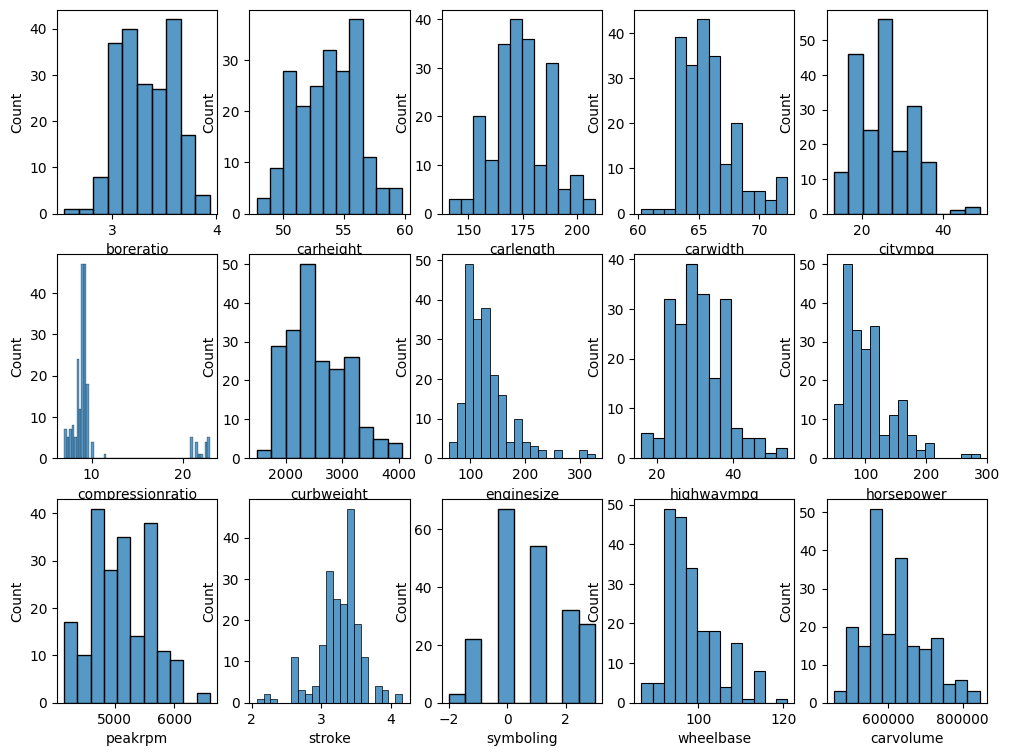

In [36]:
plt.figure(figsize = (12, 9))

for i, col in enumerate(num_index):
    ax = plt.subplot(3, 5, i+1)
    sns.histplot(x = str(col), data = X)

plt.show()

**symboling은 위험 평가 지표 같음 - 스케일링에 부적합 - 범주형 변수로 이동**

In [37]:
num_index.remove('symboling')
ob_index.append('symboling')

# 4. 전처리

In [38]:
print(ob_index) ; print(num_index)

['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem', 'brand', 'symboling']
['boreratio', 'carheight', 'carlength', 'carwidth', 'citympg', 'compressionratio', 'curbweight', 'enginesize', 'highwaympg', 'horsepower', 'peakrpm', 'stroke', 'wheelbase', 'carvolume']


In [43]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

transform = [('ob', OneHotEncoder(handle_unknown = 'ignore'), ob_index), ('num', StandardScaler(), num_index)]
col_transformer = ColumnTransformer(transformers = transform)
col_transformer

ColumnTransformer(transformers=[('ob', OneHotEncoder(handle_unknown='ignore'),
                                 ['CarName', 'fueltype', 'aspiration',
                                  'doornumber', 'carbody', 'drivewheel',
                                  'enginelocation', 'enginetype',
                                  'cylindernumber', 'fuelsystem', 'brand',
                                  'symboling']),
                                ('num', StandardScaler(),
                                 ['boreratio', 'carheight', 'carlength',
                                  'carwidth', 'citympg', 'compressionratio',
                                  'curbweight', 'enginesize', 'highwaympg',
                                  'horsepower', 'peakrpm', 'stroke',
                                  'wheelbase', 'carvolume'])])

In [46]:
X_std = col_transformer.fit_transform(X)

# 5. 모델링

In [47]:
from sklearn.model_selection import train_test_split

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size = 0.2, random_state = 42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(164, 233) (164, 1)
(41, 233) (41, 1)


In [50]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor, BaggingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.svm import SVR


In [52]:
models = {
        'Decision Tree': DecisionTreeRegressor(),
        'Random Forest': RandomForestRegressor(),
        'Gradient Boosting': GradientBoostingRegressor(),
        'Extra Tree': ExtraTreesRegressor(),
        'Bagging': BaggingRegressor(),
        'XGBoost': XGBRegressor(),
        'LGBM Regressor': LGBMRegressor(),
        'SVM': SVR()
        }

In [53]:
baseline_results = []

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    baseline_results.append((model_name, rmse))

baseline_results

[('Decision Tree', 3495.0718322004764),
 ('Random Forest', 1910.3359855189437),
 ('Gradient Boosting', 2374.804947618608),
 ('Extra Tree', 2680.2253490733237),
 ('Bagging', 1954.0358797994563),
 ('XGBoost', 2860.835863901683),
 ('LGBM Regressor', 3309.7070907012794),
 ('SVM', 9318.415719279335)]

# 6. 최적화

In [54]:
from sklearn.model_selection import GridSearchCV

In [55]:
models = {
        'Decision Tree': (DecisionTreeRegressor(), {'max_depth': range(2, 12, 2),
                                                    'min_samples_split': range(5, 100, 20),
                                                    'min_samples_leaf': range(1, 10, 3)
                                                    }),
    
        'Random Forest': (RandomForestRegressor(), {'n_estimators': range(50, 160, 50),
                                                   'max_depth': range(2, 12, 2),
                                                   'min_samples_split': range(5, 100, 20),
                                                    'min_samples_leaf': range(1, 10, 3)
                                                   }),
        'Gradient Boosting': (GradientBoostingRegressor(), {'n_estimators': range(50, 160, 50),
                                                           'max_depth': range(2, 12, 2),
                                                           'min_samples_split': range(5, 100, 20)
                                                           }),
        'Extra Tree': (ExtraTreesRegressor(), {'n_estimators': range(50, 160, 50),
                                               'max_depth': range(2, 12, 2),
                                               'min_samples_split': range(5, 100, 20),
                                               'min_samples_leaf': range(1, 10, 3)
                                               }),
        'Bagging': (BaggingRegressor(), {'n_estimators': range(10, 300, 40),
                                       # 'max_depth': range(2, 12, 2),
                                       # 'min_samples_split': range(5, 100, 20)
                                       # base_estimator= RandomForestRegressor()
                                       }),
        'XGBoost': (XGBRegressor(), {'n_estimators': range(50, 160, 50),
                                     'max_depth': range(2, 12, 2),
                                     'learning_rate': [0.01, 0.1, 0.2],
                                     'min_child_weight': range(1, 10, 3)
                                     }),
        'LGBM Regressor': (LGBMRegressor(), {'n_estimators': range(50, 160, 50),
                                           'max_depth': range(2, 12, 2),
                                           'min_child_samples': range(5, 100, 20)
                                           }),
        'SVM': (SVR(), {'epsilon' : [0.1, 0.2, 0.3],
                        'C': [100, 200, 300],
                        'kernel': ['linear', 'poly', 'rbf'],
                        'gamma': [0.1, 0.2, 0.3]
                        })
        }

In [57]:
optimized_results = []
best_models = []


for model_name, (model, param_grid) in models.items():
    gs = GridSearchCV(model, param_grid, n_jobs = -1, cv = 3, scoring = 'neg_mean_squared_error')
    gs.fit(X_train, y_train)
    
    
    best_model = gs.best_estimator_
    best_params = gs.best_params_
    
    y_pred = best_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    
    optimized_results.append((model_name, rmse))
    best_models.append((model_name, best_model))

print(optimized_results)
print(best_models)

/Users/minkim/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/minkim/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/minkim/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/minkim/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: Dat

[('Decision Tree', 2673.1445025922453), ('Random Forest', 1907.4402644696452), ('Gradient Boosting', 2377.0868967216793), ('Extra Tree', 2549.7880574477367), ('Bagging', 1912.3552013728465), ('XGBoost', 2350.408874230509), ('LGBM Regressor', 2559.215184325612), ('SVM', 3153.1876958331554)]
[('Decision Tree', DecisionTreeRegressor(max_depth=10, min_samples_leaf=4, min_samples_split=5)), ('Random Forest', RandomForestRegressor(max_depth=10, min_samples_split=5, n_estimators=50)), ('Gradient Boosting', GradientBoostingRegressor(max_depth=2, min_samples_split=5)), ('Extra Tree', ExtraTreesRegressor(max_depth=8, min_samples_split=5, n_estimators=50)), ('Bagging', BaggingRegressor(n_estimators=50)), ('XGBoost', XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None,

/Users/minkim/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/minkim/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/minkim/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/minkim/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Ple

In [58]:
final_model = {
               'Decision Tree': DecisionTreeRegressor(max_depth=10, min_samples_leaf=4, min_samples_split=5), 
               'Random Forest': RandomForestRegressor(max_depth=10, min_samples_split=5, n_estimators=50),
               'Gradient Boosting': GradientBoostingRegressor(max_depth=2, min_samples_split=5), 
               'Extra Tree': ExtraTreesRegressor(max_depth=8, min_samples_split=5, n_estimators=50), 
               'Bagging': BaggingRegressor(n_estimators=50), 
               'XGBoost': XGBRegressor(learning_rate=0.1, max_depth=2, min_child_weight=1), 
               'LGBM Regressor': LGBMRegressor(max_depth=2, min_child_samples=5, n_estimators=150), 
               'SVM': SVR(C=300, epsilon=0.3, gamma=0.1, kernel='linear')
              }

In [59]:
def scores(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    r2 = model.score(X_test, y_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    return r2, rmse, mae

In [61]:
name = []
r2score = []
rmsescore = []
maescore = []

for model_name, model in final_model.items():
    r2, rmse, mae = scores(model, X_train, y_train, X_test, y_test)

    best_models.append((model_name, best_model))
    
    name.append(model_name)
    r2score.append(r2)
    rmsescore.append(rmse)
    maescore.append(mae)

final_results = pd.DataFrame({'Algorithm': name,
                             'R2 Score': r2score,
                             'Rooted Mean Squared Error': rmsescore,
                             'Mean Absolute Error': maescore})
final_results

,Algorithm,R2 Score,Rooted Mean Squared Error,Mean Absolute Error
0,Decision Tree,0.909484,2673.144503,1897.350166
1,Random Forest,0.952668,1933.014941,1358.230376
2,Gradient Boosting,0.928987,2367.717678,1810.725980
3,Extra Tree,0.926673,2405.978551,1590.467316
4,Bagging,0.957646,1828.559206,1341.298610
5,XGBoost,0.927121,2398.614613,1803.924292
6,LGBM Regressor,0.917035,2559.215184,1817.998690
7,SVM,0.874055,3153.187696,2057.180684


**Bagging**

In [62]:
baseline_results

[('Decision Tree', 3495.0718322004764),
 ('Random Forest', 1910.3359855189437),
 ('Gradient Boosting', 2374.804947618608),
 ('Extra Tree', 2680.2253490733237),
 ('Bagging', 1954.0358797994563),
 ('XGBoost', 2860.835863901683),
 ('LGBM Regressor', 3309.7070907012794),
 ('SVM', 9318.415719279335)]

In [63]:
optimized_results

[('Decision Tree', 2673.1445025922453),
 ('Random Forest', 1907.4402644696452),
 ('Gradient Boosting', 2377.0868967216793),
 ('Extra Tree', 2549.7880574477367),
 ('Bagging', 1912.3552013728465),
 ('XGBoost', 2350.408874230509),
 ('LGBM Regressor', 2559.215184325612),
 ('SVM', 3153.1876958331554),
 ('Decision Tree', 2673.1445025922453),
 ('Random Forest', 1933.014940755653),
 ('Gradient Boosting', 2367.7176783600366),
 ('Extra Tree', 2405.978551412243),
 ('Bagging', 1828.5592058450575),
 ('XGBoost', 2398.614613415072),
 ('LGBM Regressor', 2559.215184325612),
 ('SVM', 3153.1876958331554)]